# Speaker diarization

A function to do speaker diarization (who speaks when) on a directory of audio files

In this notebook we will go over the function's docs and outputs and see an end-to-end example of running it.

1. [Documentation](#chapter1)
2. [End-to-end Demo](#chapter2)

<a id="chapter1"></a>
## 1. Documentation

The function receive a directory path with all the audio files in it. It walk through the directory, get all the audio file. Then it does the speaker diarization on these audio files to detect who speaks when. 

### 1.1. Parameters:
* **context**: `mlrun.MLClientCtx`
    
    The MLRun context
    
* **input_path**: `str`
 
    The input directory with all the audio files (now we support mp3, flv, mp4, wma, wav formats)
     
* **output_directory**: `str`
 
    The directory that is used to store the result of the nemo diarization pipeline. 
     
* **condition_show_plot**: `bool`
    If set to true, the diarization results will be plotted in the notebook
    
* **num_speakers**: `int`
    Number of sepakers in the audio file
    
* **vad_model**: `str`
    Name of the VAD model to use
    
* **speaker_embeddings_model**: `str`
    Name of the speaker embeddings model to use
    
* **msdd_model**: `str`
    Name of the msdd model to use
    
* **msdd_model**: `str`
    Name of the msdd model to use
    
* **device**: `str`
    Device to use for diarization (default cuda if cuda available, else cpu)
    
* **kwargs**: `dict`
    Additional arguments to pass to the diarizer following the format <config_name>__<parameter_name>__<attribute_name>.
    The diarization pipeline has 5 configs: GeneralConfig, VADConfig, SpeakerEmbeddingConfig, ClusteringConfig, MSDDConfig. For different config we have different parameters to pass. Please refer to Nemo's [documentation](https://docs.nvidia.com/deeplearning/nemo/user-guide/docs/en/stable/asr/speaker_diarization/intro.html#) for details. Please note the default configurations in this function is suitable for telephone recordings involving 2~8 speakers in a session and may not show the best performance on the other types of acoustic conditions or dialogues.

### 1.2. Outputs:

There are two outputs of this function. Please note for each audio file, we will log a dataframe of the speaker segments.

* **output_path**: `str`
    
    The directory stored all the Nemo results 
    
* **errors** : `dict`
    A dict of errors when processing the audio files if any

<a id="chapter2"></a>
## 2. Demo

### 2.1 Importing the speaker_diarization function from hub

To import the function directly from hub, use:

speaker_diarization = mlrun.import_function("hub://speaker_diarization")

### 2.2 Run the function

In [2]:
import tempfile
import mlrun
artifact_path = tempfile.mktemp()
speaker_diarization_func = mlrun.import_function("function.yaml")

> 2023-08-29 06:23:41,423 [info] Storing function: {'name': 'speaker-diarization-diarize', 'uid': 'cd6adcce200046be98a3826b10431717', 'db': None}


Diarizing:   0%|          | 0/1 [00:00<?, ?file/s]

[NeMo I 2023-08-29 06:24:01 clustering_diarizer:127] Loading pretrained vad_multilingual_marblenet model from NGC
[NeMo I 2023-08-29 06:24:01 cloud:58] Found existing object /User/.cache/torch/NeMo/NeMo_1.20.0/vad_multilingual_marblenet/670f425c7f186060b7a7268ba6dfacb2/vad_multilingual_marblenet.nemo.
[NeMo I 2023-08-29 06:24:01 cloud:64] Re-using file from: /User/.cache/torch/NeMo/NeMo_1.20.0/vad_multilingual_marblenet/670f425c7f186060b7a7268ba6dfacb2/vad_multilingual_marblenet.nemo
[NeMo I 2023-08-29 06:24:01 common:913] Instantiating model from pre-trained checkpoint


[NeMo W 2023-08-29 06:24:01 modelPT:161] If you intend to do training or fine-tuning, please call the ModelPT.setup_training_data() method and provide a valid configuration file to setup the train data loader.
    Train config : 
    manifest_filepath: /manifests/ami_train_0.63.json,/manifests/freesound_background_train.json,/manifests/freesound_laughter_train.json,/manifests/fisher_2004_background.json,/manifests/fisher_2004_speech_sampled.json,/manifests/google_train_manifest.json,/manifests/icsi_all_0.63.json,/manifests/musan_freesound_train.json,/manifests/musan_music_train.json,/manifests/musan_soundbible_train.json,/manifests/mandarin_train_sample.json,/manifests/german_train_sample.json,/manifests/spanish_train_sample.json,/manifests/french_train_sample.json,/manifests/russian_train_sample.json
    sample_rate: 16000
    labels:
    - background
    - speech
    batch_size: 256
    shuffle: true
    is_tarred: false
    tarred_audio_filepaths: null
    tarred_shard_strategy: sca

[NeMo I 2023-08-29 06:24:01 features:289] PADDING: 16
[NeMo I 2023-08-29 06:24:02 save_restore_connector:249] Model EncDecClassificationModel was successfully restored from /User/.cache/torch/NeMo/NeMo_1.20.0/vad_multilingual_marblenet/670f425c7f186060b7a7268ba6dfacb2/vad_multilingual_marblenet.nemo.
[NeMo I 2023-08-29 06:24:02 clustering_diarizer:157] Loading pretrained titanet_large model from NGC
[NeMo I 2023-08-29 06:24:02 cloud:58] Found existing object /User/.cache/torch/NeMo/NeMo_1.20.0/titanet-l/11ba0924fdf87c049e339adbf6899d48/titanet-l.nemo.
[NeMo I 2023-08-29 06:24:02 cloud:64] Re-using file from: /User/.cache/torch/NeMo/NeMo_1.20.0/titanet-l/11ba0924fdf87c049e339adbf6899d48/titanet-l.nemo
[NeMo I 2023-08-29 06:24:02 common:913] Instantiating model from pre-trained checkpoint


[NeMo W 2023-08-29 06:24:02 modelPT:161] If you intend to do training or fine-tuning, please call the ModelPT.setup_training_data() method and provide a valid configuration file to setup the train data loader.
    Train config : 
    manifest_filepath: /manifests/combined_fisher_swbd_voxceleb12_librispeech/train.json
    sample_rate: 16000
    labels: null
    batch_size: 64
    shuffle: true
    is_tarred: false
    tarred_audio_filepaths: null
    tarred_shard_strategy: scatter
    augmentor:
      noise:
        manifest_path: /manifests/noise/rir_noise_manifest.json
        prob: 0.5
        min_snr_db: 0
        max_snr_db: 15
      speed:
        prob: 0.5
        sr: 16000
        resample_type: kaiser_fast
        min_speed_rate: 0.95
        max_speed_rate: 1.05
    num_workers: 15
    pin_memory: true
    
[NeMo W 2023-08-29 06:24:02 modelPT:168] If you intend to do validation, please call the ModelPT.setup_validation_data() or ModelPT.setup_multiple_validation_data() method 

[NeMo I 2023-08-29 06:24:02 features:289] PADDING: 16
[NeMo I 2023-08-29 06:24:02 save_restore_connector:249] Model EncDecSpeakerLabelModel was successfully restored from /User/.cache/torch/NeMo/NeMo_1.20.0/titanet-l/11ba0924fdf87c049e339adbf6899d48/titanet-l.nemo.


[NeMo W 2023-08-29 06:24:02 clustering_diarizer:411] Deleting previous clustering diarizer outputs.


[NeMo I 2023-08-29 06:24:02 speaker_utils:93] Number of files to diarize: 1
[NeMo I 2023-08-29 06:24:02 clustering_diarizer:309] Split long audio file to avoid CUDA memory issue



splitting manifest: 100%|██████████| 1/1 [00:17<00:00, 17.12s/it]

[NeMo I 2023-08-29 06:24:20 vad_utils:107] The prepared manifest file exists. Overwriting!
[NeMo I 2023-08-29 06:24:20 classification_models:272] Perform streaming frame-level VAD
[NeMo I 2023-08-29 06:24:20 collections:301] Filtered duration for loading collection is  0.00 hours.
[NeMo I 2023-08-29 06:24:20 collections:302] Dataset loaded with 3 items, total duration of  0.04 hours.
[NeMo I 2023-08-29 06:24:20 collections:304] # 3 files loaded accounting to # 1 labels




vad:   0%|          | 0/3 [00:00<?, ?it/s][NeMo W 2023-08-29 06:24:20 nemo_logging:349] User provided device_type of 'cuda', but CUDA is not available. Disabling
    

vad: 100%|██████████| 3/3 [00:03<00:00,  1.12s/it]

[NeMo I 2023-08-29 06:24:23 clustering_diarizer:250] Generating predictions with overlapping input segments




generating preds: 100%|██████████| 1/1 [00:01<00:00,  1.46s/it]
                                                               

[NeMo I 2023-08-29 06:24:24 clustering_diarizer:262] Converting frame level prediction to speech/no-speech segment in start and end times format.



creating speech segments: 100%|██████████| 1/1 [00:00<00:00,  3.74it/s]

[NeMo I 2023-08-29 06:24:25 clustering_diarizer:287] Subsegmentation for embedding extraction: scale0, output/real_state/speaker_outputs/subsegments_scale0.json
[NeMo I 2023-08-29 06:24:25 clustering_diarizer:343] Extracting embeddings for Diarization
[NeMo I 2023-08-29 06:24:25 collections:301] Filtered duration for loading collection is  0.00 hours.
[NeMo I 2023-08-29 06:24:25 collections:302] Dataset loaded with 178 items, total duration of  0.07 hours.
[NeMo I 2023-08-29 06:24:25 collections:304] # 178 files loaded accounting to # 1 labels




[1/5] extract embeddings: 100%|██████████| 3/3 [00:06<00:00,  2.08s/it]

[NeMo I 2023-08-29 06:24:31 clustering_diarizer:389] Saved embedding files to output/real_state/speaker_outputs/embeddings
[NeMo I 2023-08-29 06:24:31 clustering_diarizer:287] Subsegmentation for embedding extraction: scale1, output/real_state/speaker_outputs/subsegments_scale1.json


[NeMo I 2023-08-29 06:24:31 clustering_diarizer:343] Extracting embeddings for Diarization
[NeMo I 2023-08-29 06:24:31 collections:301] Filtered duration for loading collection is  0.00 hours.
[NeMo I 2023-08-29 06:24:31 collections:302] Dataset loaded with 215 items, total duration of  0.07 hours.
[NeMo I 2023-08-29 06:24:31 collections:304] # 215 files loaded accounting to # 1 labels



[2/5] extract embeddings: 100%|██████████| 4/4 [00:05<00:00,  1.46s/it]


[NeMo I 2023-08-29 06:24:37 clustering_diarizer:389] Saved embedding files to output/real_state/speaker_outputs/embeddings
[NeMo I 2023-08-29 06:24:37 clustering_diarizer:287] Subsegmentation for embedding extraction: scale2, output/real_state/speaker_outputs/subsegments_scale2.json
[NeMo I 2023-08-29 06:24:37 clustering_diarizer:343] Extracting embeddings for Diarization
[NeMo I 2023-08-29 06:24:37 collections:301] Filtered duration for loading collection is  0.00 hours.
[NeMo I 2023-08-29 06:24:37 collections:302] Dataset loaded with 270 items, total duration of  0.07 hours.
[NeMo I 2023-08-29 06:24:37 collections:304] # 270 files loaded accounting to # 1 labels



[3/5] extract embeddings: 100%|██████████| 5/5 [00:06<00:00,  1.30s/it]

[NeMo I 2023-08-29 06:24:44 clustering_diarizer:389] Saved embedding files to output/real_state/speaker_outputs/embeddings
[NeMo I 2023-08-29 06:24:44 clustering_diarizer:287] Subsegmentation for embedding extraction: scale3, output/real_state/speaker_outputs/subsegments_scale3.json


[NeMo I 2023-08-29 06:24:44 clustering_diarizer:343] Extracting embeddings for Diarization
[NeMo I 2023-08-29 06:24:44 collections:301] Filtered duration for loading collection is  0.00 hours.
[NeMo I 2023-08-29 06:24:44 collections:302] Dataset loaded with 363 items, total duration of  0.08 hours.
[NeMo I 2023-08-29 06:24:44 collections:304] # 363 files loaded accounting to # 1 labels



[4/5] extract embeddings: 100%|██████████| 6/6 [00:06<00:00,  1.12s/it]

[NeMo I 2023-08-29 06:24:50 clustering_diarizer:389] Saved embedding files to output/real_state/speaker_outputs/embeddings
[NeMo I 2023-08-29 06:24:50 clustering_diarizer:287] Subsegmentation for embedding extraction: scale4, output/real_state/speaker_outputs/subsegments_scale4.json
[NeMo I 2023-08-29 06:24:50 clustering_diarizer:343] Extracting embeddings for Diarization
[NeMo I 2023-08-29 06:24:50 collections:301] Filtered duration for loading collection is  0.00 hours.
[NeMo I 2023-08-29 06:24:50 collections:302] Dataset loaded with 547 items, total duration of  0.08 hours.
[NeMo I 2023-08-29 06:24:50 collections:304] # 547 files loaded accounting to # 1 labels




[5/5] extract embeddings: 100%|██████████| 9/9 [00:07<00:00,  1.26it/s]

[NeMo I 2023-08-29 06:24:57 clustering_diarizer:389] Saved embedding files to output/real_state/speaker_outputs/embeddings



[NeMo W 2023-08-29 06:24:57 speaker_utils:464] cuda=False, using CPU for eigen decomposition. This might slow down the clustering process.

clustering: 100%|██████████| 1/1 [00:00<00:00,  1.08it/s]

[NeMo I 2023-08-29 06:24:58 clustering_diarizer:464] Outputs are saved in /User/functions/speaker_diarization/output/real_state directory



[NeMo W 2023-08-29 06:24:58 der:185] Check if each ground truth RTTMs were present in the provided manifest file. Skipping calculation of Diariazation Error Rate


> 2023-08-29 06:24:59,168 [info] Done:
  audio_file diarization_results               converted_audio_file  \
0          .          real_state  /tmp/converted_audio_luba6cuc.wav   

  speaker_segments  
0       real_state  


project,uid,iter,start,state,name,labels,inputs,parameters,results,artifacts
default,...10431717,0,Aug 29 06:23:41,completed,speaker-diarization-diarize,v3io_user=pengwkind=owner=pengwhost=jupyter-pengw-5f99fb678d-zkdv7,,input_path=./data/real_state.mp3output_directory=./outputnum_speakers=2device=cpucondition_show_plot=True,,real_stateoutput_directorydataseterrored_files


> 2023-08-29 06:24:59,631 [info] Run execution finished: {'status': 'completed', 'name': 'speaker-diarization-diarize'}


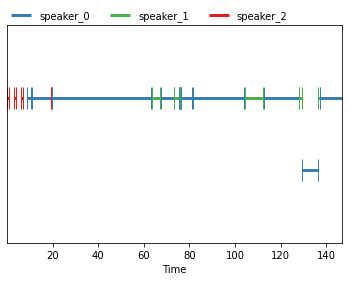

In [3]:
speaker_diarization_run = speaker_diarization_func.run(
    handler = "diarize",
    params={
        "input_path": "./data/real_state.mp3",
        "output_directory": "./output",
        "num_speakers": 2,
        "device": "cpu",
        "condition_show_plot": True,
    },
    local=True,
    returns=["output_directory: path", "dataset: dataset", "errored_files"],
    artifact_path=artifact_path,
)


In [4]:
speaker_diarization_run.outputs

{'real_state': 'store://artifacts/default/speaker-diarization-diarize_real_state:cd6adcce200046be98a3826b10431717',
 'output_directory': 'store://artifacts/default/speaker-diarization-diarize_output_directory:cd6adcce200046be98a3826b10431717',
 'dataset': 'store://artifacts/default/speaker-diarization-diarize_dataset:cd6adcce200046be98a3826b10431717',
 'errored_files': 'store://artifacts/default/speaker-diarization-diarize_errored_files:cd6adcce200046be98a3826b10431717'}

In [5]:
artifact_path += f"/{speaker_diarization_run.metadata.name}/{speaker_diarization_run.metadata.iteration}/"

In [6]:
df = mlrun.get_dataitem(artifact_path + "dataset.parquet").as_df()

In [7]:
df

,audio_file,diarization_results,converted_audio_file,speaker_segments
0,.,real_state,/tmp/converted_audio_luba6cuc.wav,real_state


In [9]:
segments_df = mlrun.get_dataitem(artifact_path+"real_state.csv").as_df()

In [10]:
segments_df

,start,end,speaker
0,0.060,1.050,speaker_2
1,2.860,4.090,speaker_2
2,5.980,6.970,speaker_2
3,8.940,10.410,speaker_0
4,10.860,19.485,speaker_0
5,19.485,19.690,speaker_2
6,19.900,63.210,speaker_0
7,63.500,67.130,speaker_1
8,67.660,73.285,speaker_0
9,73.285,75.535,speaker_1
